# Restaurant Sales Data Analysis – Mini Project


## Introduction

This mini project focuses on analyzing restaurant sales data to understand sales performance, customer behavior, and product trends.  
The analysis aims to extract meaningful business insights that can help improve decision-making related to pricing, inventory, and customer preferences.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/restaurant_sales_data.csv')
df.head()

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


In [55]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nDescription:")
print(df.describe)

Shape: (17534, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        17534 non-null  object        
 1   Customer ID     17534 non-null  object        
 2   Category        17534 non-null  object        
 3   Item            17534 non-null  object        
 4   Price           17534 non-null  float64       
 5   Quantity        17534 non-null  float64       
 6   Order Total     17534 non-null  float64       
 7   Order Date      17534 non-null  datetime64[ns]
 8   Payment Method  17534 non-null  object        
 9   Day of Week     17534 non-null  object        
 10  Year            17534 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(6)
memory usage: 1.4+ MB
None

Description:
<bound method NDFrame.describe of          Order ID Customer ID     Category             

In [20]:
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.nunique())
print(df.dtypes)

Order ID             0
Customer ID          0
Category             0
Item              1758
Price              876
Quantity           430
Order Total        430
Order Date           0
Payment Method    1082
dtype: int64
0
Order ID          17534
Customer ID         100
Category              5
Item                 26
Price                14
Quantity              5
Order Total          41
Order Date          730
Payment Method        3
dtype: int64
Order ID           object
Customer ID        object
Category           object
Item               object
Price             float64
Quantity          float64
Order Total       float64
Order Date         object
Payment Method     object
dtype: object


In [22]:
# Fill missing Item
df['Item'] = df['Item'].fillna('Unknown Item')

# Fill Price using category-wise median
df['Price'] = df.groupby('Category')['Price'].transform(
    lambda x: x.fillna(x.median())
)

# Fill Quantity
df['Quantity'] = df['Quantity'].fillna(1)

# Recalculate Order Total
df['Order Total'] = df['Price'] * df['Quantity']

# Fill Payment Method
df['Payment Method'] = df['Payment Method'].fillna('Unknown')

# Convert Order Date
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [23]:
df.isnull().sum()
df.dtypes


,0
Order ID,object
Customer ID,object
Category,object
Item,object
Price,float64
Quantity,float64
Order Total,float64
Order Date,datetime64[ns]
Payment Method,object


###Basic Business Metrics (KPIs)

In [24]:
total_sales = df['Order Total'].sum()
total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()
avg_order_value = df['Order Total'].mean()

print(f"Total Sales: {total_sales:.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Customers: {total_customers}")
print(f"Average Order Value: {avg_order_value:.2f}")


Total Sales: 343228.00
Total Orders: 17534
Total Customers: 100
Average Order Value: 19.57


###Category-wise Sales Analysis

In [25]:
category_sales = (
    df.groupby('Category')['Order Total']
    .sum()
    .sort_values(ascending=False)
)

category_sales


,Order Total
Category,
Main Dishes,161687.0
Starters,60237.0
Desserts,57543.0
Side Dishes,40839.0
Drinks,22922.0


<Axes: title={'center': 'Sales by Category'}, ylabel='Category'>

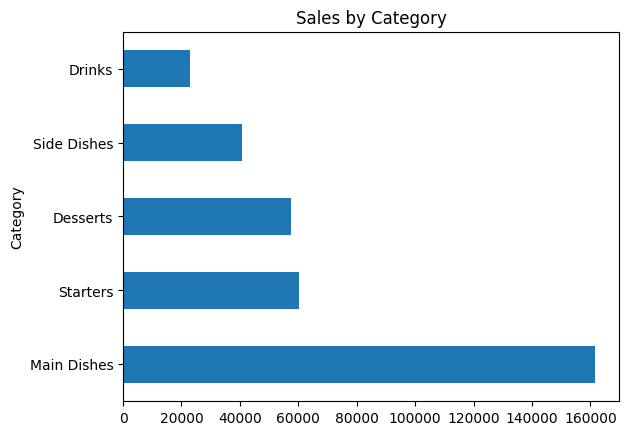

In [27]:
category_sales.plot(kind='barh', title='Sales by Category')


###Top-Selling Items

In [29]:
top_items = (
    df.groupby('Item')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_items


,Quantity
Item,
Unknown Item,4410.0
Pasta Alfredo,3094.0
Side Salad,2932.0
Ice Cream,2929.0
Water,2899.0
French Fries,2721.0
Grilled Chicken,2492.0
Mashed Potatoes,2374.0
Chocolate Cake,2348.0


<Axes: title={'center': 'Top 10 Selling Items'}, ylabel='Item'>

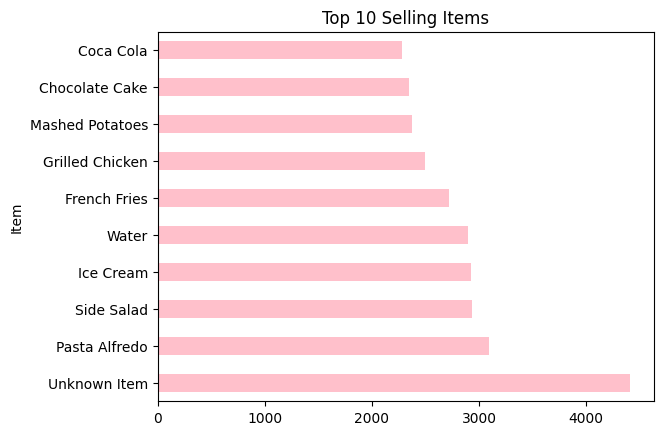

In [32]:
top_items.plot(kind='barh', color='pink', title='Top 10 Selling Items')


###Payment Method Analysis

In [33]:
payment_sales = (
    df.groupby('Payment Method')['Order Total']
    .sum()
    .sort_values(ascending=False)
)

payment_sales


,Order Total
Payment Method,
Cash,110943.0
Credit Card,107253.5
Digital Wallet,105302.5
Unknown,19729.0


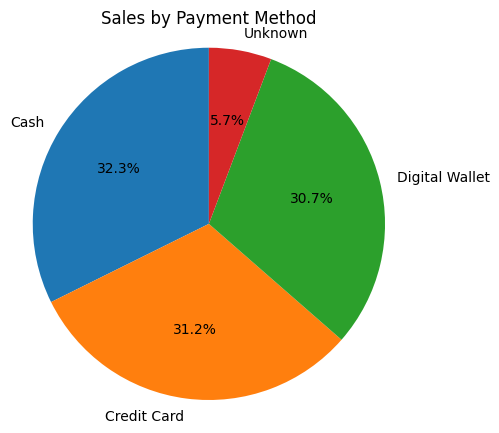

In [36]:
plt.figure(figsize=(5, 5))
plt.pie(payment_sales, labels=payment_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Payment Method')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Time-Based Sales Trend

####Daily sales trend

In [38]:
daily_sales = (
    df.groupby('Order Date')['Order Total']
    .sum()
)

daily_sales.head()


,Order Total
Order Date,
2022-01-01,640.0
2022-01-02,479.0
2022-01-03,332.0
2022-01-04,629.5
2022-01-05,472.5


<Axes: title={'center': 'Daily Sales Trend'}, xlabel='Order Date'>

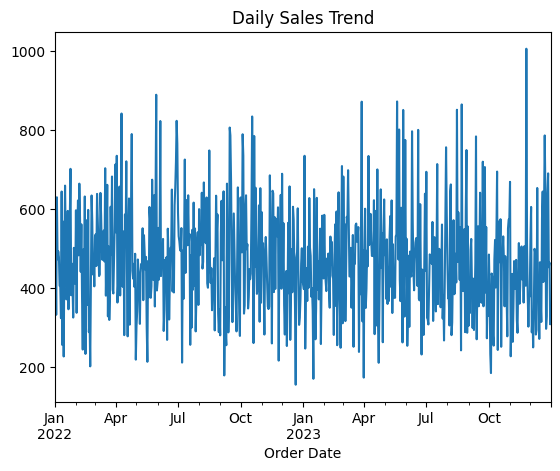

In [44]:
daily_sales.plot(title='Daily Sales Trend')


In [43]:
daily_sales_total = df.groupby('Day of Week')['Order Total'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(daily_sales_total)

Day of Week
Monday       49689.5
Tuesday      49983.0
Wednesday    47370.5
Thursday     48434.5
Friday       48967.0
Saturday     48771.5
Sunday       50012.0
Name: Order Total, dtype: float64


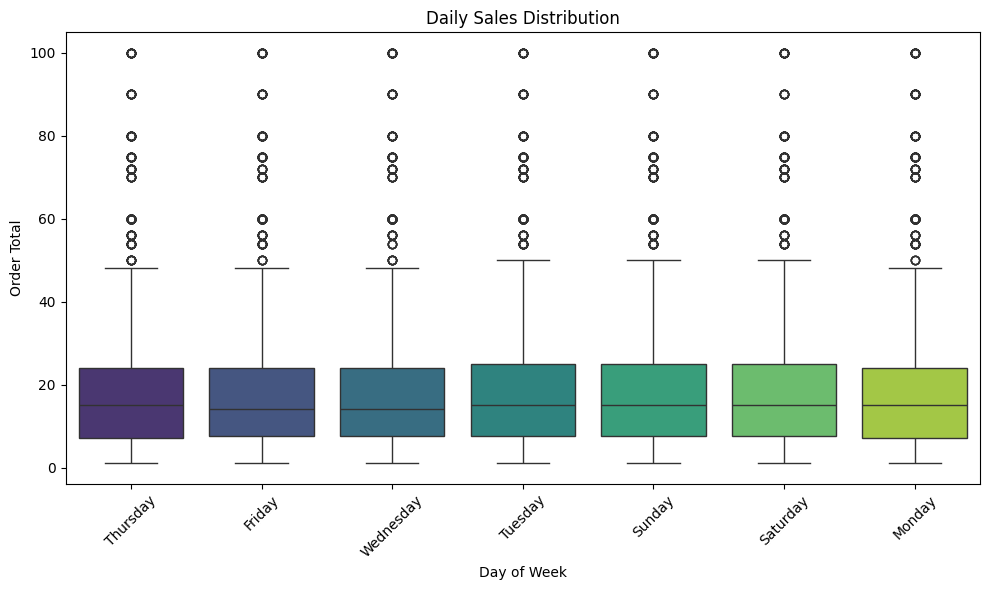

In [41]:
df['Day of Week'] = df['Order Date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of Week', y='Order Total', data=df, palette='viridis', hue='Day of Week', legend=False)
plt.title('Daily Sales Distribution')
plt.xlabel('Day of Week')
plt.ylabel('Order Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####Monthly sales trend

In [47]:
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='ME'))['Order Total'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Order Date'].dt.strftime('%b') # Extract abbreviated month name
print(monthly_sales[['Month', 'Order Total']])

   Month  Order Total
0    Jan      14504.0
1    Feb      12877.5
2    Mar      15932.5
3    Apr      15014.0
4    May      14321.0
5    Jun      15194.5
6    Jul      14972.0
7    Aug      15014.0
8    Sep      13674.5
9    Oct      16033.5
10   Nov      14444.5
11   Dec      13492.0
12   Jan      13617.0
13   Feb      12647.0
14   Mar      14981.0
15   Apr      14420.0
16   May      15507.0
17   Jun      13813.0
18   Jul      14158.0
19   Aug      14922.0
20   Sep      13339.0
21   Oct      13491.0
22   Nov      12943.5
23   Dec      13915.5


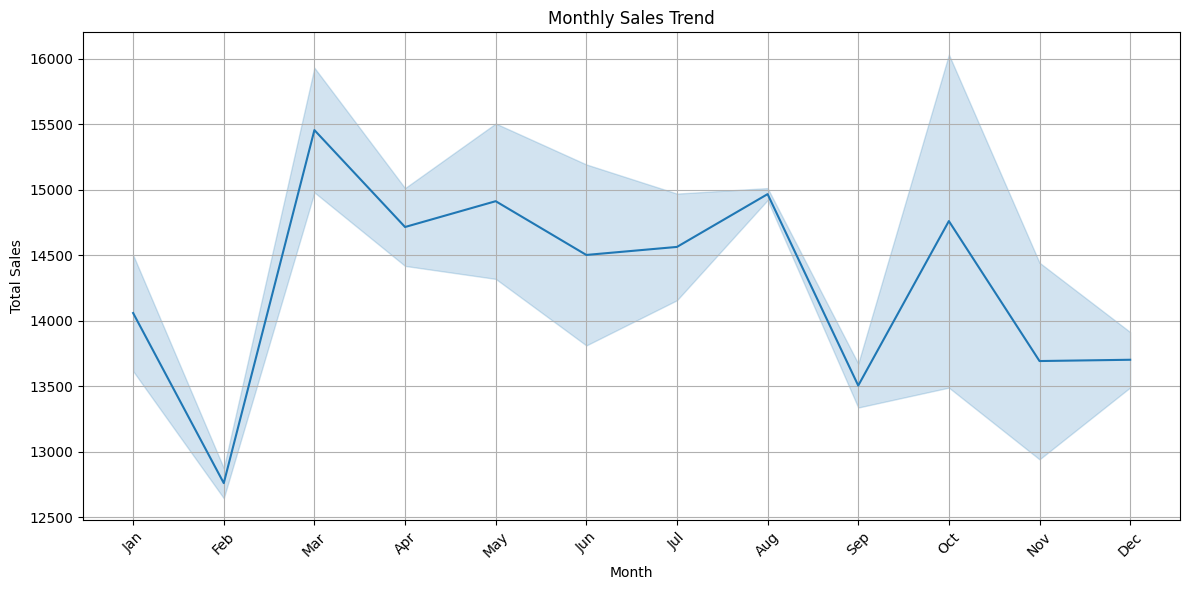

In [46]:
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='ME'))['Order Total'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Order Date'].dt.strftime('%b') # Extract abbreviated month name

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Order Total', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####Yearly sales trend

In [48]:
df['Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Year')['Order Total'].sum().reset_index()
print(yearly_sales)

   Year  Order Total
0  2022     175474.0
1  2023     167754.0


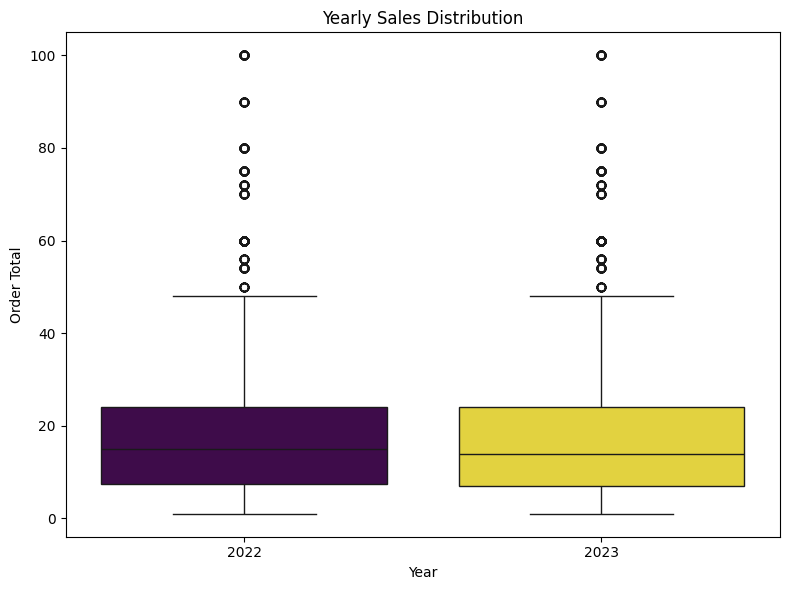

In [49]:
df['Year'] = df['Order Date'].dt.year

plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='Order Total', data=df, palette='viridis', hue='Year', legend=False)
plt.title('Yearly Sales Distribution')
plt.xlabel('Year')
plt.ylabel('Order Total')
plt.tight_layout()
plt.show()

###Quantity vs Order Total Relationship

In [50]:
df[['Quantity', 'Order Total']].corr()


,Quantity,Order Total
Quantity,1.00000,0.51194
Order Total,0.51194,1.00000


<Axes: title={'center': 'Quantity vs Order Total'}, xlabel='Quantity', ylabel='Order Total'>

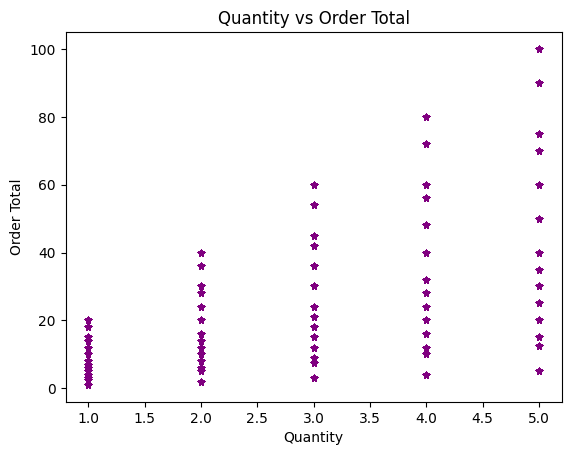

In [53]:
df.plot.scatter(x='Quantity', y='Order Total', title='Quantity vs Order Total', marker='*', color='purple')

###Orders count by Category

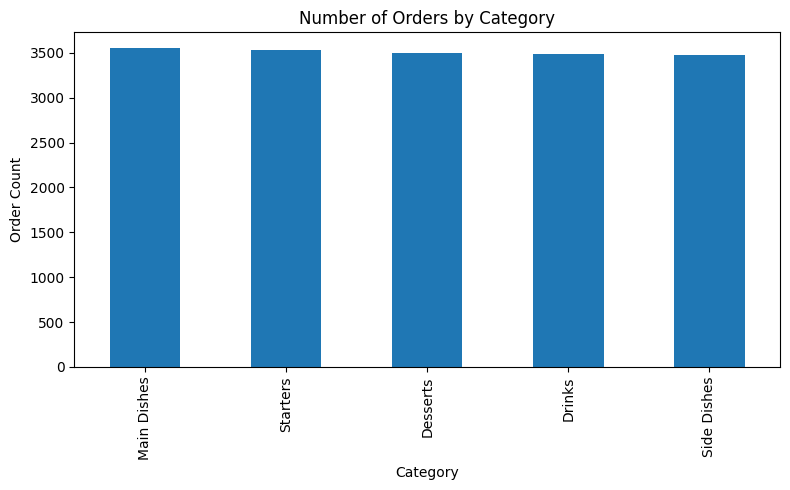

In [57]:
order_count_category = df['Category'].value_counts()

plt.figure(figsize=(8,5))
order_count_category.plot(kind='bar')
plt.title('Number of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()


###Distribution of Order Total

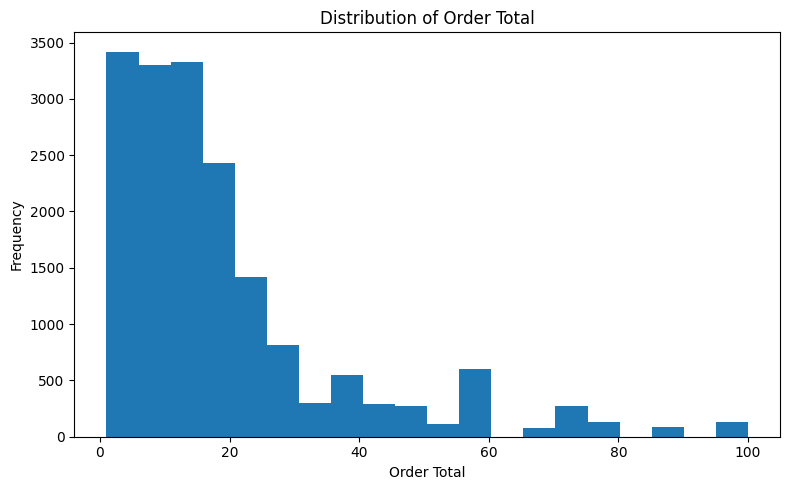

In [58]:
plt.figure(figsize=(8,5))
plt.hist(df['Order Total'], bins=20)
plt.title('Distribution of Order Total')
plt.xlabel('Order Total')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Key Insights

- The restaurant generated a total revenue of **343,228** from **17,534 orders**, with an average order value of **19.57**.
- **Main Dishes** contribute the highest share of revenue, accounting for nearly half of total sales.
- Payment methods such as **Cash, Credit Card, and Digital Wallet** are used almost equally, indicating balanced customer payment preferences.
- A significant quantity of sales falls under **"Unknown Item"**, suggesting data quality gaps in item-level records.
- Sales remain relatively consistent throughout the week, with **Sunday** recording slightly higher revenue.
- **2022 recorded higher total sales than 2023**, indicating a mild year-over-year decline.
- There is a **moderate positive correlation (0.51)** between quantity ordered and order total, showing that higher quantities generally lead to increased revenue.


## Summary

This project analyzed restaurant sales data to understand revenue patterns, customer behavior, and product performance. The analysis shows that main dishes are the primary revenue drivers, sales are stable across time, and multiple payment options are equally preferred. These insights can support better menu planning, data management, and operational decision-making.
